<a href="https://colab.research.google.com/github/JaimeJesusTorres/proyectoFinal/blob/master/PSOMochila.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nombre_artículo: límite_inferior - límite_superior]

Centenarios: 0 - 1
Billetes: 0 - 1
JoyeroG: 0 - 1
Joyerop: 0 - 1
Estampillas: 0 - 1
Obra arte: 0 - 1
Pisapapeles: 0 - 1

 total incluyendo 7 hay una variable...


[0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 1, 1, 1]
[0, 0, 0, 0, 

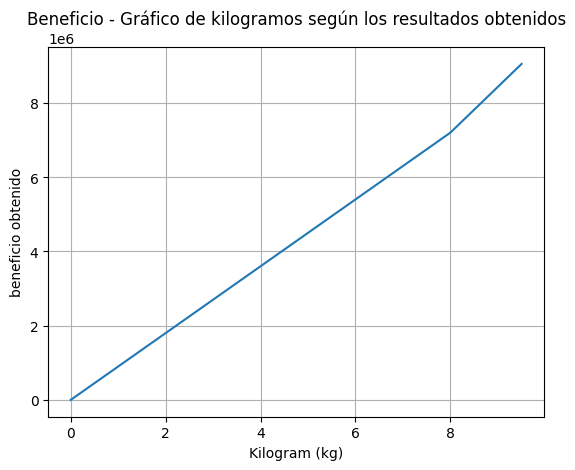

In [98]:
#------------------------------------------------------------------------------
#
#   Yusuf DURSUN
#   Python üzerinde Parçacık Sürü Optimizasyonunun Kullanılarak Knapsack(Sırt Çantası) Probleminin Dinamik Bir Şekilde Çözülmesi
#
#------------------------------------------------------------------------------
# Yusuf DURSUN
# Resolver dinámicamente el problema de la mochila usando la optimización del enjambre de partículas en Python

# Proje bağımlılıklarının dahil edilmesi...
# Incluyendo dependencias del proyecto...
import matplotlib.pyplot as plt
import random
import math


# Global değişkenlerin tanımlanması [Önemli: Diğerler değişkenler ve algoritmanın çalıştırılması kısmı sayfanın en aşağısındadır]...
# Definición de variables globales [Importante: otras variables y la ejecución del algoritmo se encuentran en la parte inferior de la página]...
isimler = ['Centenarios', 'Billetes', 'JoyeroG', 'Joyerop', 'Estampillas', 'Obra arte', 'Pisapapeles']
kar = [750000, 500000, 2750000, 950000, 1850000, 3250000, 3950000]
kg = [2.5, 1, 6, 2.5, 1.5, 3, 5]
maxKg = 10


# Maksimize etmeye çalıştığımız fonksiyon...
# La función que estamos tratando de maximizar...
def fncMax(x):
    t = fncTaneKar(x)
    return t + fncTaneKilogram(x, t)


def fncTaneKar(x):
    toplam = 0
    for i in range(len(x)):
        toplam += x[i] * kar[i]  # Tane * Kâr
    return toplam


def fncTaneKilogram(x, sifirlayanEleman):
    toplam = 0
    for i in range(len(x)):
        toplam += x[i] * kg[i]  # Tane * kg

    if toplam <= maxKg:
        if toplam <= sifirlayanEleman:
            return sifirlayanEleman - toplam
        else:
            return 0
    else:
        return -sifirlayanEleman

    """
        Eğer kilogram maxKg 'ı geçerse;
        fonksiyondan ceza puanı olarak 1.fonksiyon değerinin negatifini döndürerek,
        sonuç değerini sıfırlıyor bu sayede varolan değeri almaması sağlanıyor...

        Si el kilogramo excede maxKg;
         Al devolver el negativo del valor de la primera función como un punto de penalización de la función,
         Restablece el valor del resultado para que no tome el valor existente...
    """



# Parcacik sınıfımız...
# Nuestra clase de partículas...
class Parcacik:
    def __init__(self, baslangicDegerleri):
        self.pozisyon = []      # Parcacik pozisyonu
        self.hiz = []           # Parcacik hızı
        self.pBest = []         # Bireysel en iyi pozisyon
        self.pBestYaklasim = -1 # Bireysel en iyi yaklaşım
        self.yaklasim = -1      # Bireysel yaklaşım

        for i in range(parSayisi):
            self.hiz.append(random.uniform(-1, 1))
            self.pozisyon.append(baslangicDegerleri[i])

    # Fonksiyona uygunluğunu hesapla...
    # Calcular la idoneidad para la función...
    def hesapla(self, fonksiyon):
        self.yaklasim = fonksiyon(self.pozisyon)

        # Şu anki pozisyonun, bireysel en iyi olup olmadığını kontrol et...
        # Compruebe si su puesto actual es su mejor individual...
        if self.yaklasim > self.pBestYaklasim or self.pBestYaklasim == -1:
            self.pBest = self.pozisyon
            self.pBestYaklasim = self.yaklasim

    # Yeni parçacık hızını güncelle...
    # Actualizar nueva velocidad de partículas...
    def hiz_guncelle(self, grupMaxPozisyon):
        w = 0.9    # Parçacığın önceki hızını koruma isteğinin katsayısı.
        c1 = 2  # Kendi en iyisini koruma isteğinin katsayısı.
        c2 = 2   # Sürünün en iyi değerini alma isteğinin katsayısı.

        for i in range(parSayisi):
            r1 = random.random()
            r2 = random.random()

            bilissel_hiz = c1 * r1 * (self.pBest[i] - self.pozisyon[i])
            sosyal_hiz = c2 * r2 * (grupMaxPozisyon[i] - self.pozisyon[i])
            self.hiz[i] = w * self.hiz[i] + bilissel_hiz + sosyal_hiz

    # Yeni güncellenen parçacık hızına göre, yeni pozisyonları hesaplama...
    # De acuerdo con la velocidad de las partículas recientemente actualizada, calcule nuevas posiciones...
    def pozisyon_guncelle(self, sinirDegerler):
        for i in range(parSayisi):
            maxZiplama = (sinirDegerler[i][1] - sinirDegerler[i][0])

            if self.hiz[i] < -maxZiplama:
                self.hiz[i] = -maxZiplama
            elif self.hiz[i] > maxZiplama:
                self.hiz[i] = maxZiplama

            self.pozisyon[i] = self.pozisyon[i] + self.hiz[i]

            if self.pozisyon[i] > sinirDegerler[i][1]:      # Eğer pozisyon üst sınır değerin üzerindeyse, üst sınır değerine çek
                self.pozisyon[i] = sinirDegerler[i][1]
            elif self.pozisyon[i] < sinirDegerler[i][0]:    # Eğer pozisyon alt sınır değerin altındaysa, alt sınır değerine çek
                self.pozisyon[i] = sinirDegerler[i][0]
            else:
                self.pozisyon[i] = round(self.pozisyon[i])

class PSO:
    adimKar, adimKg, grupMaxPozisyon, grupMaxYaklasim = [], [], [], -1
    #pso = PSO(fncMax, baslangicDegerleri, sinirDegerler, parcacikSayisi=len(isimler), suruSayisi=100, maxIter=50, adimlarYazdirilsinMi=True)
    def __init__(self, fonksiyon, baslangicDegerleri, sinirDegerler, parcacikSayisi, suruSayisi, maxIter, adimlarYazdirilsinMi = True): # fncMax, baslangicDegerleri, sinirDegerler, parcacikSayisi=7, maxIter=0.1
        global parSayisi

        parSayisi = len(baslangicDegerleri)
        self.grupMaxYaklasim = -1  # Grup için en iyi yaklaşım
        self.grupMaxPozisyon = []  # Grup için en iyi pozisyon

        # Sürümüze başlangıç değerlerini atayalım...
        # Asignemos valores iniciales a nuestra versión...
        suru = []
        for i in range(suruSayisi):
            suru.append(Parcacik(baslangicDegerleri))

        # Optimizasyon döngüsü başlangıcı...
        # Inicio del ciclo de optimización...
        sayac = 0
        while sayac < maxIter:
            sayac += 1

            # Sürüdeki parçacıklarının fonksiyona uygunluğunun hesaplanması...
            # Calcular la idoneidad de las partículas del enjambre para la función...
            for j in range(suruSayisi):
                suru[j].hesapla(fonksiyon)

                # Şimdiki parçacığın global en iyi olup olmadığının kontrolü ve gerekli güncellemelerin yapılması...
                # Comprobar si la partícula actual es la mejor a nivel mundial y realizar las actualizaciones necesarias...
                if suru[j].yaklasim > self.grupMaxYaklasim or self.grupMaxYaklasim == -1:
                    self.grupMaxPozisyon = list(suru[j].pozisyon)
                    self.grupMaxYaklasim = float(suru[j].yaklasim)

            # Sürüdeki hız ve pozisyonların güncellenmesi...
            # Actualizando velocidad y posiciones en el rebaño...
            for j in range(suruSayisi):
                suru[j].hiz_guncelle(self.grupMaxPozisyon)
                suru[j].pozisyon_guncelle(sinirDegerler)

            toplamKar = 0
            toplamKg = 0
            for i in range(parcacikSayisi):
                toplamKar += self.grupMaxPozisyon[i] * kar[i]
                toplamKg += self.grupMaxPozisyon[i] * kg[i]
            self.adimKar.append(toplamKar)
            self.adimKg.append(toplamKg)

            if adimlarYazdirilsinMi:
                print(self.grupMaxPozisyon)

    # Sonuçların yazdırılması...
    # Imprimiendo los resultados...
    def SonucuYazdir(self):
        print('\n\nRESULTADOS:\n\n')
        toplamKar = 0
        toplamKg = 0
        for i in range(len(self.grupMaxPozisyon)):
            print(isimler[i], ': ', self.grupMaxPozisyon[i], ' unidad', sep='')
            toplamKar += self.grupMaxPozisyon[i] * kar[i]
            toplamKg += self.grupMaxPozisyon[i] * kg[i]
        print('#' * 50, '\nBeneficio obtenido: ', toplamKar, ',\nKilogramo: ', toplamKg, sep='')

    # Sonuçların plot ile ekrana çizdirilmesi [Sonuç görüntüsünü bilgisayara kaydetmek istemiyorsak 'dosyaAdi' adlı parametre boş kalmalı!]...
    # Dibujar los resultados en la pantalla con un gráfico [Si no queremos guardar la imagen del resultado en la computadora, el parámetro llamado 'fileName' debe permanecer vacío!]...
    def SonucuCizdir(self, dosyaAdi = ''):
        plt.plot(self.adimKg, self.adimKar)
        plt.xlabel('Kilogram (kg)')
        plt.ylabel('beneficio obtenido')
        plt.title('Beneficio - Gráfico de kilogramos según los resultados obtenidos')
        plt.grid(True)

        if not(dosyaAdi == ''):         # 'dosyaAdi' adlı değişken boş değilse, o isimle dosyayı png formatında kaydet...# Si la variable llamada 'fileName' no está vacía, guarde el archivo en formato png con ese nombre...
            dosyaAdi = dosyaAdi+".png"
            plt.savefig(dosyaAdi)

        plt.show()
        plt.close()


# Başlangıç ve sınır değerlerinin atanıp algoritmanın çalıştırılması...
# Asignando valores iniciales y límite y ejecutando el algoritmo...

#baslangicDegerleri = [1, 1, 1, 1, 1, 1, 1]  # Baslangiç degerleri [x1, x2...]
sinirDegerler = [(0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1), (0, 1)]  # Sınır değerler [(x1_min,x1_max),(x2_min,x2_max)...]

print('[nombre_artículo: límite_inferior - límite_superior]\n', sep='')
baslangicDegerleri = []
#sinirDegerler = []
for i in range(len(isimler)):
    baslangicDegerleri.append(0)                                                    # Baslangiç degerleri [x1, x2...]
    sinirDegerler.append((baslangicDegerleri[i], math.floor(maxKg/kg[i])))          # Sınır değerler [(x1_min,x1_max),(x2_min,x2_max)...]
    print(isimler[i], ': ', sinirDegerler[i][0], ' - ', sinirDegerler[i][1], sep='')
print('\n total incluyendo ', len(isimler), ' hay una variable...\n\n', sep='')

pso = PSO(fncMax, baslangicDegerleri, sinirDegerler, parcacikSayisi=len(isimler), suruSayisi=50, maxIter=150, adimlarYazdirilsinMi=True)
pso.SonucuYazdir()
pso.SonucuCizdir(dosyaAdi='test')

# Algoritma sonu :)
# Fin del algoritmo :)